# Question 1: Linear Models with Materials Data
**1.1 Loading and examing our data**

You are provided with a dataset containing fictional materials science-related data. The data is in the HW1 folder named `AutoAM_dataset.csv` The dataset includes features such as temperature, pressure, and composition, and the target variable is a property of interest (e.g., conductivity).

a) Load the dataset and explore its structure. Heads up though! I poisoned the dataset a with things like outliers, missing cells, duplicate entries, nonsense values etc. Identify problematic data. 

I suggest using both descriptive statistics as well as some plotting to visualize the data. If you are really feeling brave you could check out and use the amazing `ydata-profiling` package (https://docs.profiling.ydata.ai/latest/). 

In [119]:
#your code goes here
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('AutoAM_dataset.csv')
#print(df)
df=df.rename(columns={"Prime Delay":"Prime_Delay", "Print Speed":"Print_Speed","X Offset Correction":"X_Offset_Correction","Y Offset Correction":"Y_Offset_Correction"})
print(df)
#print(df.head(0))

     Prime_Delay  Print_Speed  X_Offset_Correction  Y_Offset_Correction  \
0            0.0     1.000000             0.000000             0.000000   
1            2.5     3.000000             0.100000                  NaN   
2            5.0     5.000000            -0.100000            -0.100000   
3            0.0     0.999931             0.000006             0.000025   
4            0.0     5.070133             0.225151             1.000000   
..           ...          ...                  ...                  ...   
97           0.0     1.585934            -0.337143            -0.372811   
98           0.0     1.568030            -0.335316            -0.365804   
99           0.0     3.410189            -0.182025            -0.226603   
100          0.0     1.558826            -0.349834            -0.328645   
101          5.0     3.837488             1.000000             1.000000   

        Score  
0    0.339554  
1    0.000000  
2    0.218576  
3    0.368919  
4    0.000000  
.. 

In [120]:
#OPTIONAL your ydata-profiling code goes here

b) Deal with the identified problematic data and deal with them however you see fit. Once you have done so, plot the data. The data set has 4 features and a score. Use scatter plots where you encode information as x, y, and color. Plot histograms or violin plots of some of the features.

In [121]:
#your data cleaning code goes here

df = df.dropna()
i = df[(df.Score>100000)].index 
df=df.drop(i)

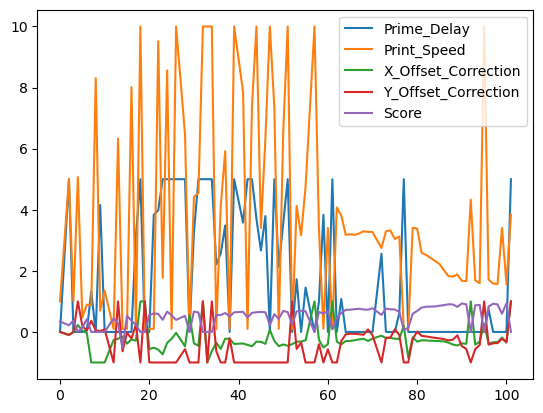

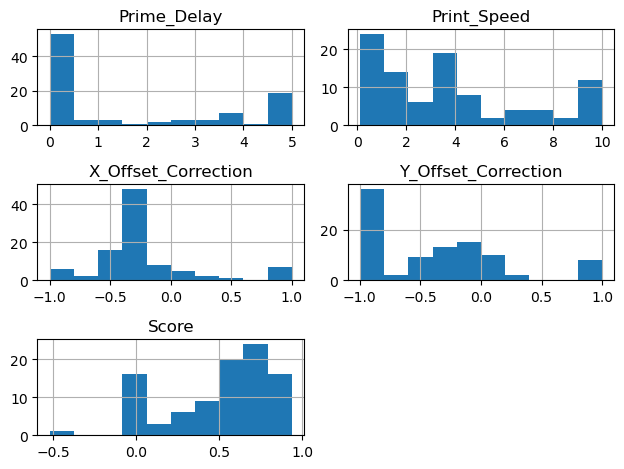

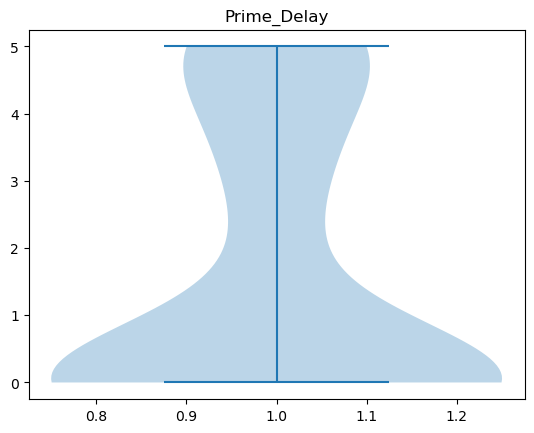

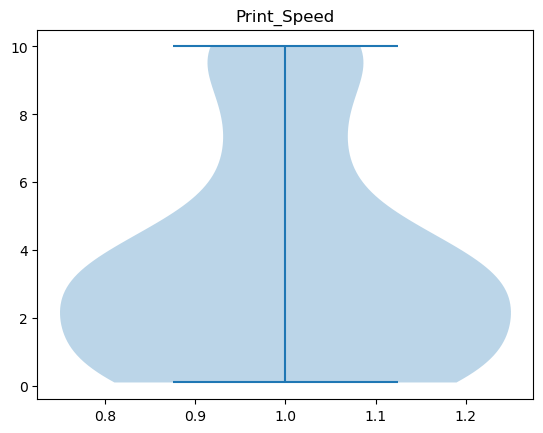

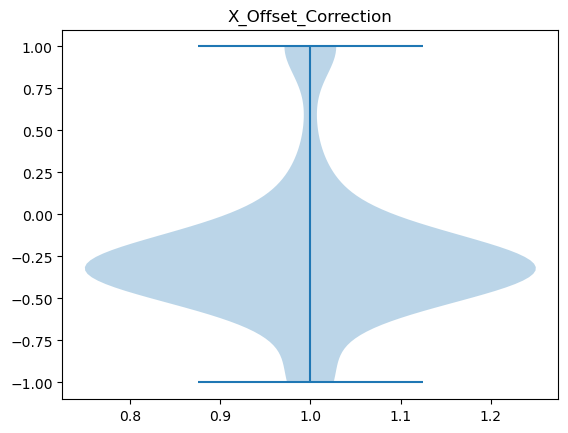

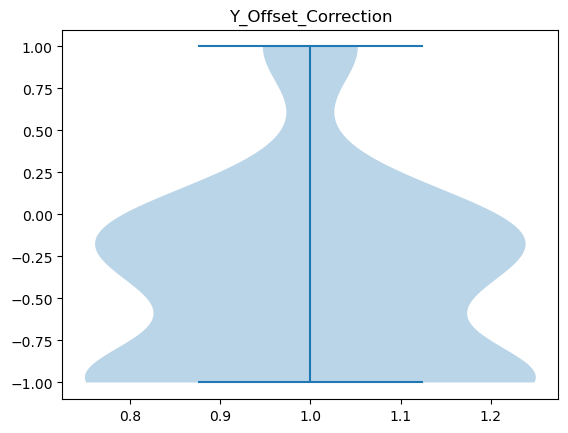

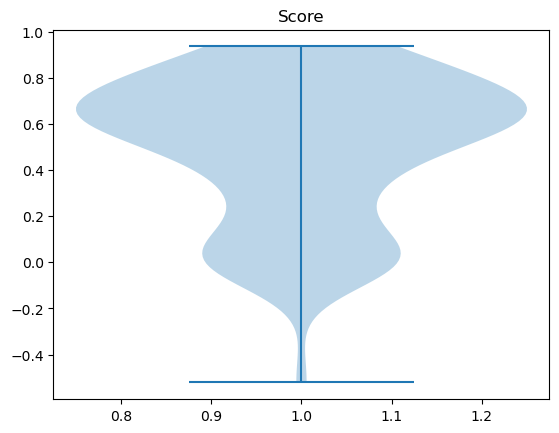

In [122]:
#your plotting code goes here

# line plot
df.plot()

# plot histograms of each variable
df.hist()
plt.tight_layout()
plt.show()

# plot violin plots of each variable
plt.violinplot(df.Prime_Delay)
plt.title("Prime_Delay")
plt.show()

plt.violinplot(df.Print_Speed)
plt.title("Print_Speed")
plt.show()

plt.violinplot(df.X_Offset_Correction)
plt.title("X_Offset_Correction")
plt.show()

plt.violinplot(df.Y_Offset_Correction)
plt.title("Y_Offset_Correction")
plt.show()

plt.violinplot(df.Score)
plt.title("Score")
plt.show()




b) Split the dataset into training and testing sets (80% training, 20% testing).



In [150]:
#your code goes here
Train = df.sample(frac = 0.8)
Test = df.drop(Train.index)

print(Train)
#print(Test)

     Prime_Delay  Print_Speed  X_Offset_Correction  Y_Offset_Correction  \
0       0.000000     1.000000             0.000000             0.000000   
4       0.000000     5.070133             0.225151             1.000000   
10      0.000000     1.350344            -1.000000             0.081764   
12      0.000000     0.100000            -0.263441            -1.000000   
20      0.000000     0.100000            -0.562308            -1.000000   
25      5.000000     0.100000            -0.225014            -1.000000   
30      3.270200     4.423434            -0.374321            -1.000000   
37      3.485758     5.921041            -0.220504            -1.000000   
42      5.000000     0.100000            -0.423268            -1.000000   
45      2.666170     3.404373            -0.323335            -1.000000   
62      0.000000     4.074460            -0.320554            -1.000000   
63      1.078526     3.809288            -0.406116            -0.299587   
68      0.000000     3.29

**1.2 Linear Model Construction and Validation**

Build a linear regression model using the statsmodels package.

a) Train the linear model on the training set.

In [129]:
#your code goes here
import statsmodels.api as sm

# use ordinary least quares regression
#mod = sm.OLS(Train.endog, Train.exog)

endog = Train.Score
exog = Train.drop('Score', axis=1)
mod = sm.OLS(endog, exog)
res = mod.fit()
print(res.summary())



                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.530
Method:                 Least Squares   F-statistic:                              22.39
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                    4.86e-12
Time:                        18:06:38   Log-Likelihood:                         -36.250
No. Observations:                  76   AIC:                                      80.50
Df Residuals:                      72   BIC:                                      89.82
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

b) Validate the model on the testing set and calculate relevant evaluation metrics.



In [155]:
#your code goes here
Test_endog = Test.Score
Test_exog = Train.drop('Score', axis=1)
#print(Test_exog)
Test_score = mod.predict(Test_exog)
#print(Test_score)


ValueError: shapes (76,4) and (76,4) not aligned: 4 (dim 1) != 76 (dim 0)

c) Interpret the model coefficients and assess the model's performance.



**<span style="color:teal">put your discussion here</span>**
